In [1]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

api = requests.get('https://api.hgbrasil.com/weather')
api = api.json()

In [2]:
hora = api['results']['time']
temperatura_max = []
temperatura_min = []
datas = []
velocidade_vento = []
descricao = []
probabilidade_chuva = []
volume_de_chuva = []
nebulosidade_percentual = []

for i in range(10):
    datas.append(api['results']['forecast'][i]['date'])
    temperatura_max.append(api['results']['forecast'][i]['max'])
    temperatura_min.append(api['results']['forecast'][i]['min'])
    velocidade_vento.append(api['results']['forecast'][i]['wind_speedy'])
    descricao.append(api['results']['forecast'][i]['description'])
    probabilidade_chuva.append(api['results']['forecast'][i]['rain_probability'])
    volume_de_chuva.append(api['results']['forecast'][i]['rain'])

velocidade_vento = [velocidade.replace('km/h','') for velocidade in velocidade_vento]
velocidade_vento = [float(x) for x in velocidade_vento]

In [3]:
print(temperatura_max)
print(temperatura_min)
print(datas)
print(velocidade_vento)
print(descricao)
print(volume_de_chuva)


[28, 28, 27, 28, 28, 30, 28, 27, 26, 26]
[18, 18, 20, 19, 17, 19, 18, 17, 18, 19]
['31/03', '01/04', '02/04', '03/04', '04/04', '05/04', '06/04', '07/04', '08/04', '09/04']
[4.36, 2.39, 2.64, 4.74, 3.46, 3.77, 4.98, 5.02, 4.38, 2.48]
['Parcialmente nublado', 'Tempo nublado', 'Chuvas esparsas', 'Tempo limpo', 'Tempo limpo', 'Tempo nublado', 'Tempo nublado', 'Tempo limpo', 'Chuvas esparsas', 'Chuva']
[0.0, 0.0, 0.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16, 24.43]


In [4]:
dados = {
    'Datas': datas,
    'Descrição': descricao,
    'Probabilidade de chuva': probabilidade_chuva 
}
descricao_tempo = pd.DataFrame(dados)
print(descricao_tempo)

   Datas             Descrição  Probabilidade de chuva
0  31/03  Parcialmente nublado                       0
1  01/04         Tempo nublado                       0
2  02/04       Chuvas esparsas                      27
3  03/04           Tempo limpo                       0
4  04/04           Tempo limpo                       0
5  05/04         Tempo nublado                       0
6  06/04         Tempo nublado                       0
7  07/04           Tempo limpo                      24
8  08/04       Chuvas esparsas                      30
9  09/04                 Chuva                     100


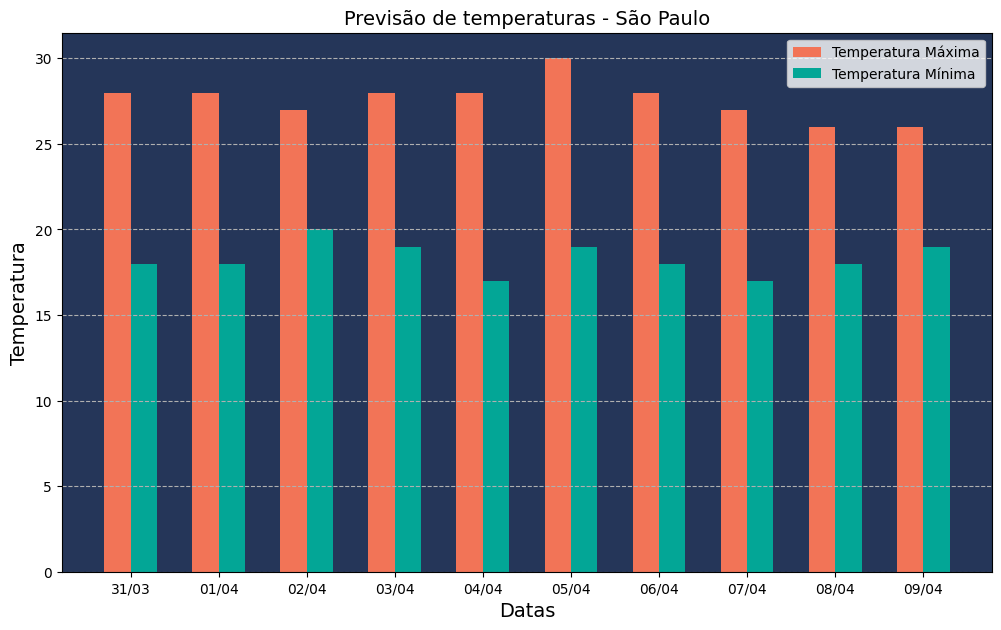

In [5]:
# Tamanho do gráfico, barra e conversão das datas
plt.figure(figsize=(12, 7))
bar_width = 0.3
data_num = range(len(datas))

# Plotagem das barras
plt.bar(data_num, temperatura_max, width=bar_width, color='#F27457', label='Temperatura Máxima')
plt.bar([p + bar_width for p in data_num], temperatura_min, width=bar_width, color='#03A696', label='Temperatura Mínima')

# Customização
plt.xticks([p + bar_width / 2 for p in data_num], datas) #Para a legenda ficar entre as duas barras
plt.title('Previsão de temperaturas - São Paulo', fontsize=14)
plt.ylabel('Temperatura', color='black', fontsize=14)
plt.xlabel('Datas', color='black', fontsize=14)
plt.gca().set_facecolor('#253659')
plt.tick_params(axis='both', colors='black')
plt.grid(axis='y', linestyle='--')  # Adiciona grade no eixo y com linha tracejada
plt.legend()
plt.show()


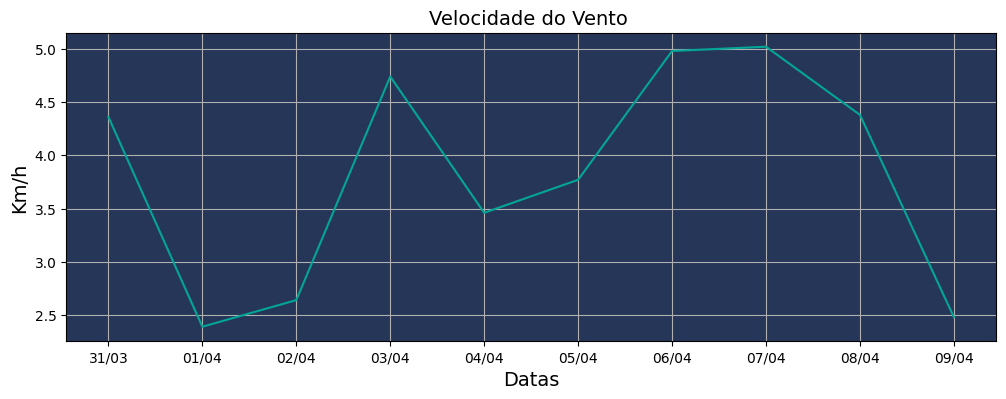

In [8]:
plt.figure(figsize=(12,4))
sns.lineplot(y = velocidade_vento, x = datas, color = '#03A696')
plt.gca().set_facecolor('#253659')
plt.grid(axis='both')
plt.ylabel('Km/h', fontsize = 14)
plt.xlabel('Datas', fontsize = 14)
plt.title('Velocidade do Vento ', fontsize = 14)
plt.show()


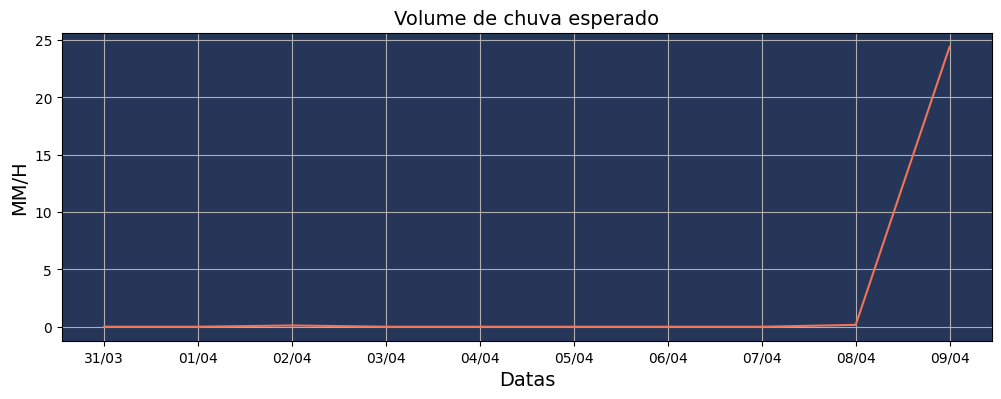

In [9]:
plt.figure(figsize=(12,4))
sns.lineplot(x = datas, y= volume_de_chuva, color= '#F27457')
plt.title('Volume de chuva esperado', fontsize=14)
plt.ylabel('MM/H', fontsize=14)
plt.xlabel('Datas', fontsize=14)
plt.gca().set_facecolor('#253659')
plt.grid(axis='both')
plt.show()
